In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Load dataset
df = pd.read_csv("Indian_Traffic_Violations.csv")

In [3]:
# Convert Date & Time columns
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce').dt.hour

In [4]:
# Extract useful temporal features
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day_name()
df['Hour'] = df['Time']

Peak Hours:
 Hour
0     150
1     163
2     174
3     163
4     186
5     155
6     158
7     183
8     205
9     162
10    168
11    175
12    160
13    176
14    175
15    144
16    175
17    167
18    150
19    155
20    179
21    163
22    151
23    163
Name: count, dtype: int64


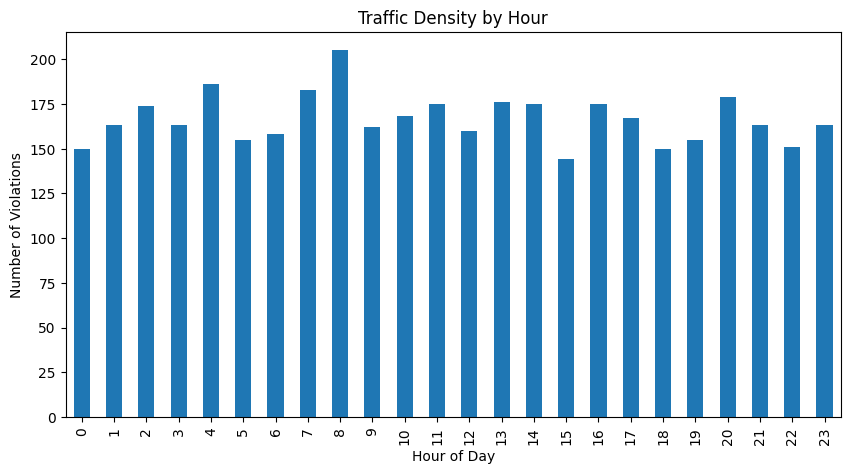

In [5]:
# ---------- 1) Peak Traffic Hours ----------
peak_hours = df['Hour'].value_counts().sort_index()
print("Peak Hours:\n", peak_hours)

plt.figure(figsize=(10,5))
peak_hours.plot(kind='bar')
plt.title("Traffic Density by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Violations")
plt.show()

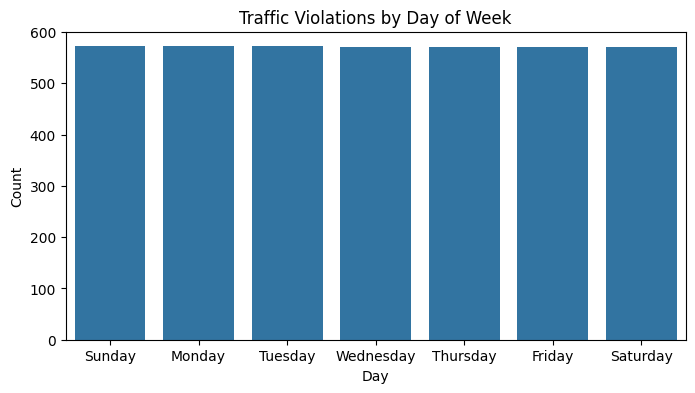

In [6]:
# ---------- 2) Violations by Day of the Week ----------
day_counts = df['Day'].value_counts()
plt.figure(figsize=(8,4))
sns.barplot(x=day_counts.index, y=day_counts.values)
plt.title("Traffic Violations by Day of Week")
plt.ylabel("Count")
plt.show()

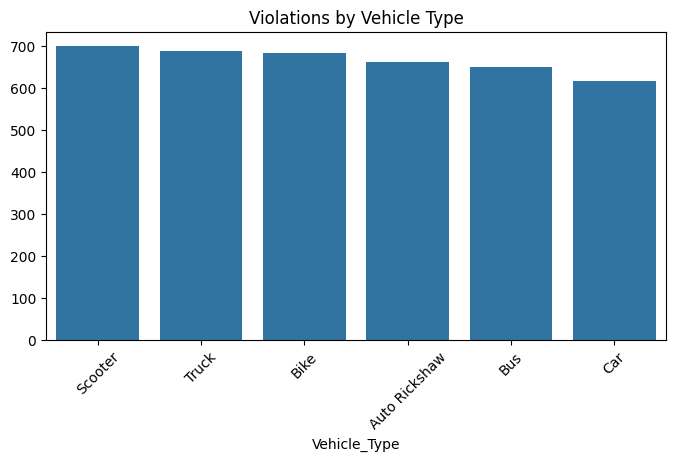

In [7]:
# ---------- 3) Violations by Vehicle Type ----------
vehicle_counts = df['Vehicle_Type'].value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=vehicle_counts.index, y=vehicle_counts.values)
plt.title("Violations by Vehicle Type")
plt.xticks(rotation=45)
plt.show()

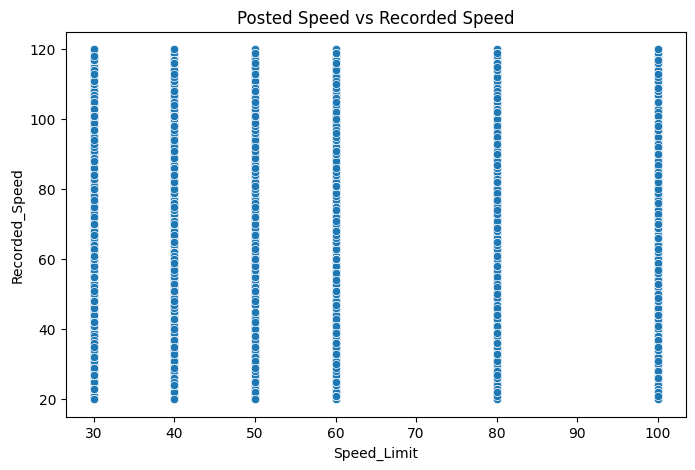

In [12]:
# ---------- 4) Speed Violations Relationship ----------
df['Speed_Limit'] = pd.to_numeric(df['Speed_Limit'], errors='coerce')
df['Recorded_Speed'] = pd.to_numeric(df['Recorded_Speed'], errors='coerce')

speed_df = df.dropna(subset=['Speed_Limit', 'Recorded_Speed'])
speed_df['Difference'] = speed_df['Recorded_Speed'] - speed_df['Speed_Limit']

plt.figure(figsize=(8,5))
sns.scatterplot(data=speed_df, x='Speed_Limit', y='Recorded_Speed')
plt.title("Posted Speed vs Recorded Speed")
plt.show()

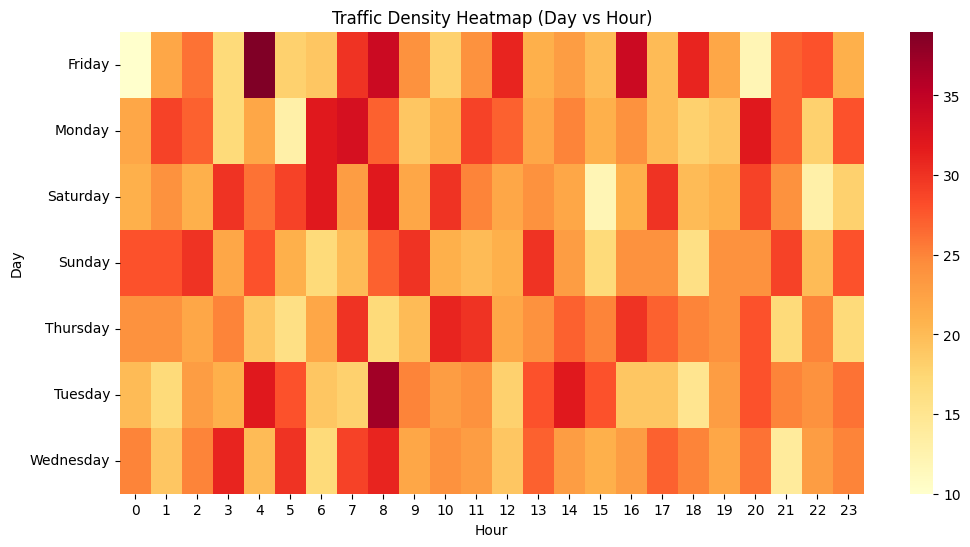

In [13]:
# ---------- 5) Heatmap for Peak Time & Day ----------
heatmap_data = df.pivot_table(index='Day', columns='Hour', values='Violation_ID', aggfunc='count')
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap='YlOrRd')
plt.title("Traffic Density Heatmap (Day vs Hour)")
plt.show()

In [15]:
# ----------Regression for Predicting Peak Hours ----------
from sklearn.linear_model import LinearRegression
model = LinearRegression()

train = speed_df[['Speed_Limit']]
target = speed_df['Recorded_Speed']
model.fit(train, target)
print("Prediction model coefficient:", model.coef_[0])

Prediction model coefficient: 0.01335517269234106
